Data Prepration and Processing

In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_labels = []
train_samples = []

In [4]:
for i in range(50):
  # 5 % of the younger individual who did experienced the side effect
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  # 5% of the older individual who did not experienced the side effect
  random_older = randint(65,99)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  #95% of the younger individual who did not experience the side effect
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  #95% of the older individual who did experience the side effect
  random_younger = randint(65,99)
  train_samples.append(random_younger)
  train_labels.append(1)

In [5]:
# for i in train_samples:
#   print(i)

converting the data to numpy array for feeding to the fit function

In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels,train_samples)

reshaping the data in range 0 to 1

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [8]:
# for i in scaled_train_samples:
#   print(i)

# Creating First Simple tf.keras sequential model

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [10]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num Of GPUs Available :", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num Of GPUs Available : 1


#Model

In [11]:
model = Sequential([
                    Dense(units=16, input_shape=(1, ), activation= 'relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


#Model Training

####Compiling the model before training

In [13]:
model.compile(optimizer=Adam(learning_rate=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

####Training the model

In [14]:
model.fit(x = scaled_train_samples, y = train_labels, batch_size=10, epochs=30, shuffle = True, verbose=2)

Epoch 1/30
210/210 - 0s - loss: 0.6817 - accuracy: 0.5271
Epoch 2/30
210/210 - 0s - loss: 0.6379 - accuracy: 0.6971
Epoch 3/30
210/210 - 0s - loss: 0.5981 - accuracy: 0.7748
Epoch 4/30
210/210 - 0s - loss: 0.5580 - accuracy: 0.8290
Epoch 5/30
210/210 - 0s - loss: 0.5200 - accuracy: 0.8600
Epoch 6/30
210/210 - 0s - loss: 0.4835 - accuracy: 0.8748
Epoch 7/30
210/210 - 0s - loss: 0.4494 - accuracy: 0.8838
Epoch 8/30
210/210 - 0s - loss: 0.4185 - accuracy: 0.8943
Epoch 9/30
210/210 - 0s - loss: 0.3915 - accuracy: 0.8995
Epoch 10/30
210/210 - 0s - loss: 0.3690 - accuracy: 0.9038
Epoch 11/30
210/210 - 0s - loss: 0.3497 - accuracy: 0.9114
Epoch 12/30
210/210 - 0s - loss: 0.3342 - accuracy: 0.9138
Epoch 13/30
210/210 - 0s - loss: 0.3212 - accuracy: 0.9167
Epoch 14/30
210/210 - 0s - loss: 0.3106 - accuracy: 0.9143
Epoch 15/30
210/210 - 0s - loss: 0.3021 - accuracy: 0.9186
Epoch 16/30
210/210 - 0s - loss: 0.2950 - accuracy: 0.9195
Epoch 17/30
210/210 - 0s - loss: 0.2893 - accuracy: 0.9171
Epoch 

##Creating Validation data on a fly

For creating the validation data on a fly we set the validation_split parameter of the fit function to the value between 0 and 1 to get our validation data.

In [15]:
model.fit(x = scaled_train_samples, y = train_labels, batch_size=10, validation_split=.1, epochs=30, shuffle = True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.2668 - accuracy: 0.9249 - val_loss: 0.2143 - val_accuracy: 0.9381
Epoch 2/30
189/189 - 0s - loss: 0.2659 - accuracy: 0.9265 - val_loss: 0.2136 - val_accuracy: 0.9381
Epoch 3/30
189/189 - 0s - loss: 0.2653 - accuracy: 0.9296 - val_loss: 0.2129 - val_accuracy: 0.9381
Epoch 4/30
189/189 - 0s - loss: 0.2650 - accuracy: 0.9265 - val_loss: 0.2124 - val_accuracy: 0.9476
Epoch 5/30
189/189 - 0s - loss: 0.2643 - accuracy: 0.9317 - val_loss: 0.2117 - val_accuracy: 0.9381
Epoch 6/30
189/189 - 0s - loss: 0.2639 - accuracy: 0.9275 - val_loss: 0.2112 - val_accuracy: 0.9476
Epoch 7/30
189/189 - 0s - loss: 0.2633 - accuracy: 0.9286 - val_loss: 0.2105 - val_accuracy: 0.9381
Epoch 8/30
189/189 - 0s - loss: 0.2628 - accuracy: 0.9275 - val_loss: 0.2101 - val_accuracy: 0.9381
Epoch 9/30
189/189 - 0s - loss: 0.2626 - accuracy: 0.9307 - val_loss: 0.2098 - val_accuracy: 0.9476
Epoch 10/30
189/189 - 0s - loss: 0.2622 - accuracy: 0.9312 - val_loss: 0.2091 - val_accuracy: 0.9476

##Neural Network for inference to predict on data from a test set using tensorflow api 

In [16]:
test_samples = []
test_labels = []

In [17]:
for i in range(10):
  # 5 % of the younger individual who did experienced the side effect
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)


  # 5% of the older individual who did not experienced the side effect
  random_older= randint(65,99)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  #95% of the younger individual who did not experienced the side effect
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  #95% of the older individual who did experienced the side effect
  random_older= randint(65,99)
  test_samples.append(random_older)
  test_labels.append(1)

In [18]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [19]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

##Predict

In [20]:
predictions = model.predict(x = scaled_test_samples, batch_size= 10, verbose=0)

In [21]:
for i in predictions:
  print(i)

[0.03831873 0.96168125]
[0.12736848 0.8726315 ]
[0.9695249  0.03047505]
[0.08292253 0.91707754]
[0.20056139 0.79943866]
[0.04255451 0.9574455 ]
[0.9840694  0.01593062]
[0.0788616  0.92113835]
[0.9695249  0.03047505]
[0.03271575 0.9672842 ]
[0.04483683 0.9551632 ]
[0.0344894 0.9655106]
[0.68649274 0.31350726]
[0.10870176 0.8912983 ]
[0.8645176  0.13548239]
[0.64639413 0.35360593]
[0.09378054 0.9062195 ]
[0.98446757 0.01553236]
[0.05518332 0.9448167 ]
[0.38223928 0.6177608 ]
[0.03831873 0.96168125]
[0.9300706  0.06992938]
[0.05810188 0.94189817]
[0.0643781  0.93562186]
[0.98435485 0.01564514]
[0.9846907  0.01530921]
[0.98389566 0.01610436]
[0.9615881  0.03841185]
[0.0344894 0.9655106]
[0.06774804 0.93225193]
[0.07498331 0.92501664]
[0.0643781  0.93562186]
[0.05518332 0.9448167 ]
[0.04255451 0.9574455 ]
[0.06774804 0.93225193]
[0.07498331 0.92501664]
[0.9844589  0.01554106]
[0.91091657 0.08908345]
[0.51539177 0.48460823]
[0.08718084 0.91281915]
[0.30129293 0.6987071 ]
[0.9844589  0.015541

In [22]:
rounded_predictions = np.argmax(predictions,axis=-1)

In [23]:
# for i in rounded_predictions:
#   print(i)

##Confusion Matrix

In [24]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [25]:
cm = confusion_matrix(y_true=test_labels, y_pred= rounded_predictions)

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[193  17]
 [ 10 200]]


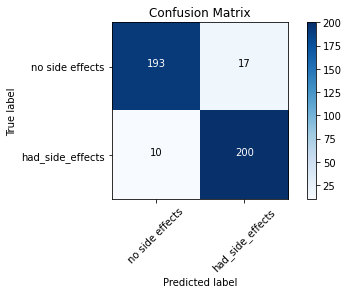

In [27]:
cm_plot_labels = ['no side effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

#Save and load the models

#save the model

In [28]:
#Check first to see if the file exist
#if not then model is saved

file_path = "/content/sample_data/medical_trail_model.h5  "

import os.path
if os.path.isfile(file_path) is False:
  model.save(file_path)


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/sample_data/medical_trail_model.h5  /assets


#Load The model

In [31]:
from tensorflow.keras.models import load_model
new_model = load_model('/content/sample_data/medical_trail_model.h5  ')

In [33]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [35]:
new_model.get_weights()

[array([[-0.11193112,  0.7344255 , -0.4123595 , -0.05495026,  0.7388691 ,
          0.43539155,  0.39400062,  0.66192627, -0.04827607, -0.08454752,
         -0.11667526,  0.01982395,  0.3998475 ,  0.57288253, -0.15056208,
          0.14684586]], dtype=float32),
 array([ 0.        , -0.1846756 ,  0.        ,  0.2028287 , -0.1323283 ,
        -0.18057938,  0.22152701, -0.19203521,  0.        ,  0.        ,
         0.        ,  0.16085903, -0.18000747, -0.12854037,  0.        ,
         0.19799972], dtype=float32),
 array([[-2.99152434e-01, -9.71013606e-02, -3.42915684e-01,
         -1.55903712e-01,  1.05615377e-01, -4.60681021e-02,
         -2.19954282e-01,  1.64651185e-01, -1.39370099e-01,
         -2.48950720e-01,  4.15666401e-02,  1.23196840e-02,
          2.64264196e-01,  2.77401954e-01, -3.38521451e-01,
          8.31257105e-02, -3.35901022e-01, -9.42692757e-02,
         -2.50047803e-01, -2.32065350e-01, -6.82213902e-03,
         -1.02096021e-01, -3.50197554e-01, -3.27753872e-01,
 

In [36]:
new_model.optimizer

#Second Method to save the model

####If we olny want to save the architecture of the model and not the weights or training configuration then we can save the model in json format

In [37]:
#save as json
json_string = model.to_json()

#save as YAML
#yaml_string = model.to_yaml

In [38]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [39]:
#model reconstruction from json

from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# #model reconstruction from yaml

# from tensorflow.keras.models import model_from_yaml
# model_architecture = model_from_yaml(yaml_string)

In [40]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


#If we only want to save the weights 

In [41]:
#Check first to see if the file exist
#if not then model is saved

file_path = "/content/sample_data/my_model_weights.h5  "

import os.path
if os.path.isfile(file_path) is False:
  model.save(file_path)

INFO:tensorflow:Assets written to: /content/sample_data/my_model_weights.h5  /assets


In [42]:
model2 = Sequential([
                    Dense(units=16, input_shape=(1, ), activation= 'relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax')
])

In [46]:
model2.load_weights('/content/sample_data/my_model_weights.h5  ')

OSError: ignored

In [47]:
model2.get_weights()

[array([[ 0.03200978, -0.5738315 , -0.33123618,  0.1561085 , -0.06967413,
          0.5293063 , -0.00708324,  0.1424607 , -0.57178396, -0.20634937,
          0.24257678,  0.14399779, -0.33904374, -0.5240039 ,  0.25370443,
         -0.18536755]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[-0.14405876,  0.20012316, -0.24626741,  0.30537227, -0.06743267,
          0.15087095,  0.30181012, -0.12338726,  0.22257403,  0.26403692,
         -0.05411276,  0.20227113,  0.27409336,  0.12474227,  0.30068347,
         -0.10465871, -0.21120813,  0.29273596, -0.28447765,  0.2303358 ,
          0.14278129,  0.2793788 ,  0.2127665 , -0.2815842 , -0.3290332 ,
         -0.3014774 , -0.11346084, -0.0188989 ,  0.046067  ,  0.29505333,
          0.15307584,  0.26678362],
        [ 0.35323045, -0.07128263, -0.02514321, -0.33726853,  0.06517082,
          0.26723072,  0.10936299, -0.35306618,  0.26466343, -0.08579883,
         -0.18